Dave Herald subiu todas as curvas de luz de ocultações no Vizier,
Será que tem algo que podemos fazer com estes dados? Alguma busca ampla de eventos estranhos? (binarios?)
Ou outras coisas que ficaram "na gaveta"?

In [1]:
import numpy as np
import pylab as pl
import pandas as pd

from astroquery.vizier import Vizier

import requests
import io

#B/occ/asteroid	

In [2]:
v = Vizier(catalog='B/occ/asteroid')
v.ROW_LIMIT = 10000000
df = v.query_constraints()[0]

In [3]:
len(df)

6765

In [4]:
n = 1000

In [5]:
df[n]

Date,Dur,HIP,SAO,XZ80Q,Lat,Lon,Alt,ObsName,Num,Name,Seq
s,s,,,,,,m,,,,
str19,float64,int32,int32,uint8,str13,str13,int16,str29,int32,str20,int16
2020-02-25T02:50:04,40.34,0,0,0,044 29 57.500,-93 07 45.100,289,S Messner,107,Camilla,7646


In [5]:
n = 10

In [6]:
r = requests.get('https://cdsarc.cds.unistra.fr/viz-bin/vizgraph?' +
                 '-s=B/occ&' + '-i=.graph_sql&' + 'sec={}&'.format(str(df['Dur'][n])) + 'date={}&'.format(str(df['Date'][n])) +
                 'num={}&'.format(str(df['Seq'][n])) + '--output=tsv')

    

In [7]:
aaa = io.BytesIO(r.content)
lines = aaa.readlines()

time = np.array([])
flux = np.array([])

for i in range(4, len(lines)-2):
    time = np.append(time, float(lines[i].decode("utf-8").rsplit()[0]))
    flux = np.append(flux, float(lines[i].decode("utf-8").rsplit()[1]))

                     


In [8]:
lines

[b'# VizieR  - Graph output B/occ Star Occultation (2020-02-25T02:50:04 , seq=7646)\n',
 b'# Resource:occ\n',
 b'# duration (s)\n',
 b'# value\n',
 b'0.0666777 \t7912\t\n',
 b'0.100017 \t7451\t\n',
 b'0.133355 \t9226\t\n',
 b'0.166694 \t7822\t\n',
 b'0.200033 \t8727\t\n',
 b'0.233372 \t7623\t\n',
 b'0.266711 \t8260\t\n',
 b'0.30005 \t7573\t\n',
 b'0.333388 \t8227\t\n',
 b'0.366727 \t8041\t\n',
 b'0.400066 \t8730\t\n',
 b'0.433405 \t8301\t\n',
 b'0.466744 \t7879\t\n',
 b'0.500083 \t7228\t\n',
 b'0.533421 \t6244\t\n',
 b'0.56676 \t7745\t\n',
 b'0.600099 \t8451\t\n',
 b'0.633438 \t7526\t\n',
 b'0.666777 \t8291\t\n',
 b'0.700116 \t8475\t\n',
 b'0.733455 \t7065\t\n',
 b'0.766793 \t8194\t\n',
 b'0.800132 \t8036\t\n',
 b'0.833471 \t7679\t\n',
 b'0.86681 \t8238\t\n',
 b'0.900149 \t8609\t\n',
 b'0.933488 \t7578\t\n',
 b'0.966826 \t7497\t\n',
 b'1.00017 \t8909\t\n',
 b'1.0335 \t8377\t\n',
 b'1.06684 \t7919\t\n',
 b'1.10018 \t8196\t\n',
 b'1.13352 \t7935\t\n',
 b'1.16686 \t7734\t\n',
 b'1.2002 \t

In [22]:
df[100].columns

<TableColumns names=('Date','Dur','HIP','SAO','XZ80Q','Lat','Lon','Alt','ObsName','Num','Name','Seq')>

In [20]:
df['Name'][n]

'Camilla'

In [21]:
df['ObsName'][n]

'S Messner'

Text(0.5, 1.0, 'Camilla -- S Messner')

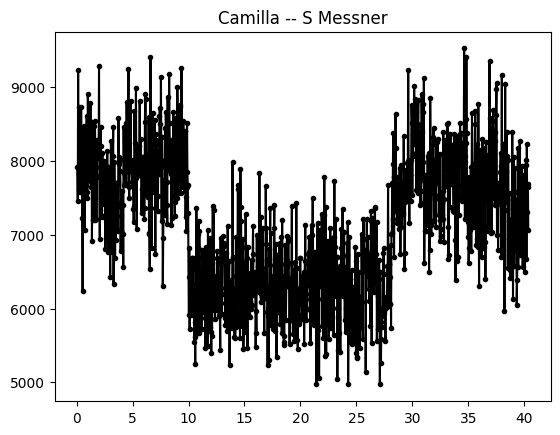

In [9]:
pl.plot(time, flux, 'k.-')
pl.title(df['Name'][n] + ' -- ' + df['ObsName'][n])

In [24]:
df2 = df[df['Name'] == 'Hertha']

In [16]:
3728.11+7984.57+(7000-1358-1000-275-200-400)

15479.68

In [20]:
-1358-1000-275-200-400

-3233

In [15]:
(7000-1358-1000-275-200-400)

3767

In [25]:
df[df['Name'] == 'Hertha']

Date,Dur,HIP,SAO,XZ80Q,Lat,Lon,Alt,ObsName,Num,Name,Seq
s,s,,,,,,m,,,,
str19,float64,int32,int32,uint8,str13,str13,int16,str29,int32,str20,int16
2015-09-25T18:47:51,118.10,0,0,0,042 01 08.000,000 44 39.000,749,C. Perello,135,Hertha,3647
2015-09-25T18:49:45,15.08,0,0,0,045 48 18.600,009 06 01.000,255,C. Gualdoni,135,Hertha,3648
2024-02-29T03:45:30,70.61,0,0,0,042 35 01.800,-114 28 13.20,1120,Chris Anderson,135,Hertha,11270


In [28]:
time

array([ 0.0666777,  0.100017 ,  0.133355 , ..., 40.3067   , 40.34     ,
       40.3733   ])

In [29]:
flux

array([7912., 7451., 9226., ..., 7690., 7642., 7067.])

In [13]:
np.savetxt(f'lc_{df["Name"][0]}_obs_by_{df["ObsName"][0]}.dat'.replace(" ", "").replace("/", "-"), np.column_stack((time, flux)), delimiter=' ')